# Resampling

## Data

The data are loaded from file with pickle in dict format.
This format is the same as in `get-data-from-fits.ipynb`
notebook.

In [1]:
import pickle
import os

In [2]:
# load the data
data_filename = 'ondrejov-halpha-labeled.pickle'
with open(os.path.join('data', data_filename), 'rb') as f:
    spectra = pickle.load(f)

## Wavelength range

In [3]:
import matplotlib.pyplot as plt
%matplotlib nbagg

In [4]:
# list of starting wavelens
wavelen_starts = list(map(
    lambda x: x['wavelen'][0], spectra.values()
))
# list of ending wavelens
wavelen_ends = list(map(
    lambda x: x['wavelen'][-1], spectra.values()
))

<IPython.core.display.Javascript object>


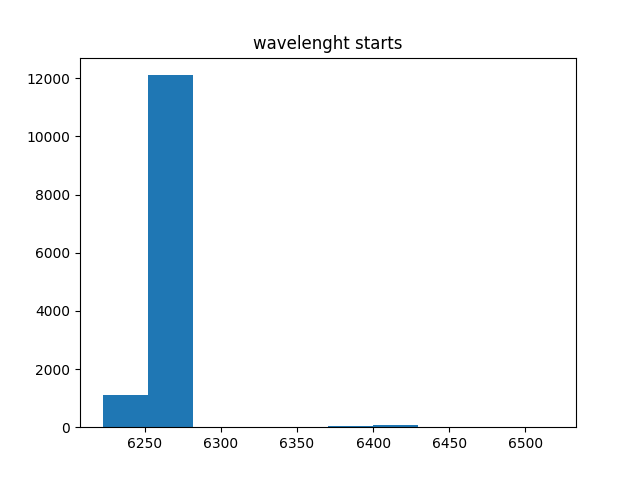

(array([  1.10300000e+03,   1.21060000e+04,   5.00000000e+00,
          1.50000000e+01,   0.00000000e+00,   3.60000000e+01,
          7.50000000e+01,   1.00000000e+00,   0.00000000e+00,
          3.00000000e+00]),
 array([ 6222.4026459 ,  6252.0050907 ,  6281.6075355 ,  6311.2099803 ,
         6340.8124251 ,  6370.41486989,  6400.01731469,  6429.61975949,
         6459.22220429,  6488.82464909,  6518.42709388]))

In [5]:
# show histogram
starts_n, starts_bins, _ = plt.hist(wavelen_starts)
plt.title('wavelenght starts')
starts_n, starts_bins

In [6]:
# derived from data above
start = 6282

<IPython.core.display.Javascript object>


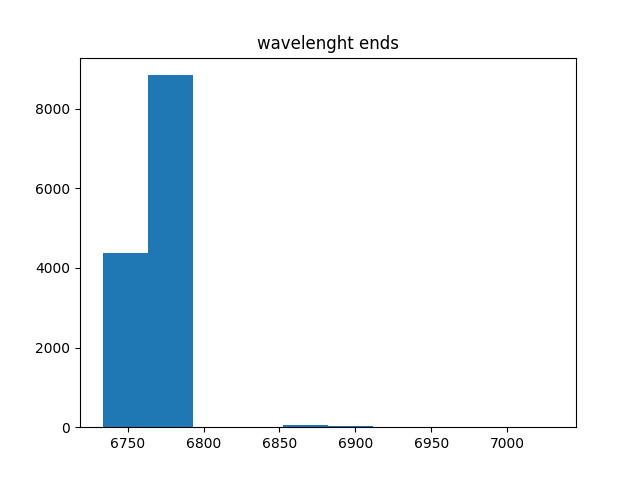

(array([  4.37900000e+03,   8.83800000e+03,   0.00000000e+00,
          1.20000000e+01,   6.00000000e+01,   3.40000000e+01,
          1.70000000e+01,   3.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 6733.49077681,  6763.18532498,  6792.87987315,  6822.57442133,
         6852.2689695 ,  6881.96351767,  6911.65806584,  6941.35261401,
         6971.04716218,  7000.74171036,  7030.43625853]))

In [7]:
plt.title('wavelenght ends')
ends_n, ends_bins, _ = plt.hist(wavelen_ends)
ends_n, ends_bins

In [8]:
end = 6733

## Sample-rate Conversion

Sample-rate conversion it the process of changing the
sampling rate of discrete signal to get new representation
of the underlying continuous signal. The sampling rate
can be either increased (upsampling) or decreased
(decimation).

In [9]:
import random

In [10]:
test_spectrum_id, test_spectrum = random.choice(list(spectra.items()))

<IPython.core.display.Javascript object>


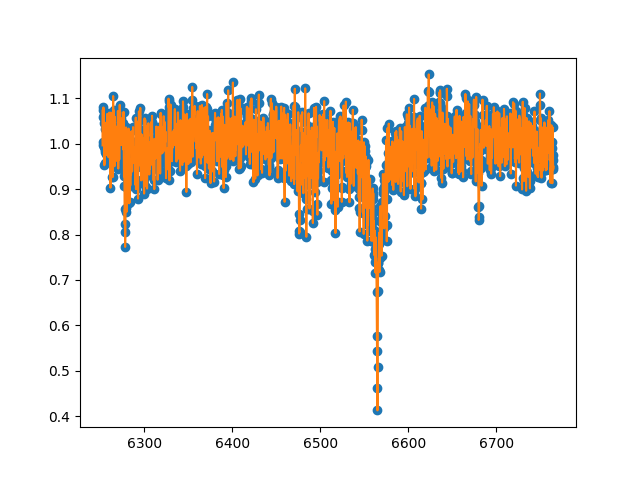

In [11]:
def plot_spectrum_with_points(spectrum):
    x = spectrum['wavelen']
    y = spectrum['norm_flux']
    plt.plot(x, y, 'o', x, y)

plot_spectrum_with_points(test_spectrum)

In [12]:
import numpy as np

If resampled, upsampled and downsampled data are
plotted it can be seen then surely upsampling is the best.
Downsampling may lost some peaks. Therefore, upsampling
is choosen but smaller sample-rate can be choosen if
computation difficulties will be observed.

<IPython.core.display.Javascript object>


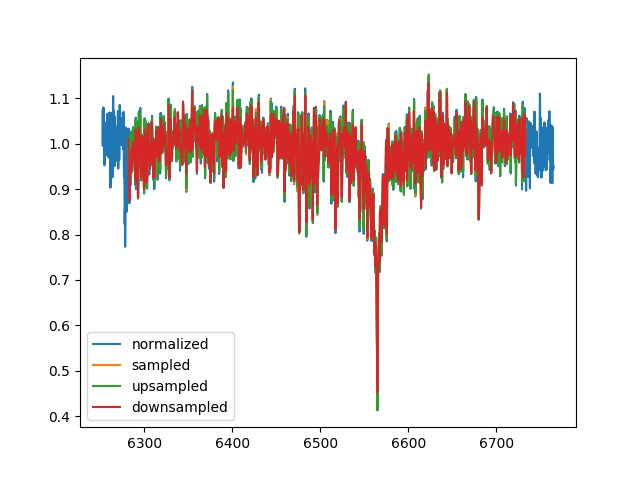

In [13]:
def resample_flux(new_wavelens, wavelens, flux):
    '''Resample spectrum defined by wavelens and flux
    to new_wavelens.'''
    return np.interp(new_wavelens, wavelens, flux)

# plot normalized spectrum
plt.plot(
    test_spectrum['wavelen'],
    test_spectrum['norm_flux'],
    label='normalized'
)

# define new wavelens whe number of wavelens is the same
# as in original spectrum
n_wavelens = test_spectrum['wavelen'].shape[0]
sampled_wavelens = np.linspace(start, end, n_wavelens)
# plot sampled spectrum
plt.plot(
    sampled_wavelens,
    resample_flux(
        sampled_wavelens,
        test_spectrum['wavelen'],
        test_spectrum['norm_flux']
    ),
    label='sampled'
)

# plot upsampled spectrum
upsampled_wavelens = np.linspace(start, end, 2 * n_wavelens)
plt.plot(
    upsampled_wavelens,
    resample_flux(
        upsampled_wavelens,
        test_spectrum['wavelen'],
        test_spectrum['norm_flux']
    ),
    label='upsampled'
)

# plot downsampled spectrum
downsampled_wavelens = np.linspace(start, end, n_wavelens // 2)
plt.plot(
    downsampled_wavelens,
    resample_flux(
        downsampled_wavelens,
        test_spectrum['wavelen'],
        test_spectrum['norm_flux']
    ),
    label='downsampled'
)

# show legend
plt.legend()

In [14]:
def are_wavelens_in_range(wavelen, start, end):
    return wavelen[0] < start and wavelen[-1] > end
    
are_wavelens_in_range(
    test_spectrum['wavelen'],
    start,
    end
)

True

In [15]:
resampled_spectra = {
    spectrum_id: spectra[spectrum_id]
    for spectrum_id in spectra
    if are_wavelens_in_range(
        spectra[spectrum_id]['wavelen'],
        start,
        end
    ) and spectrum_id != 'rd270026' # this is outlier
}

for spectrum in resampled_spectra.values():
    wavelen = spectrum['wavelen']
    spectrum['resampled_wavelen'] = upsampled_wavelens
    spectrum['resampled_flux'] = resample_flux(
        upsampled_wavelens,
        spectrum['wavelen'],
        spectrum['norm_flux']
    )

<IPython.core.display.Javascript object>


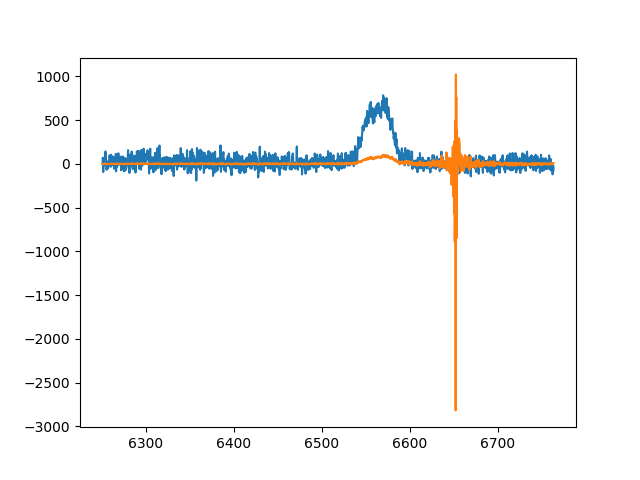

In [18]:
# strange
foo = spectra['rd270026']
plt.plot(foo['wavelen'], foo['raw_flux'])
plt.plot(foo['wavelen'], foo['norm_flux'])

In [19]:
len(spectra), len(resampled_spectra)

(13344, 13208)

In [20]:
# serialize the object for later use
pickle_filename = 'ondrejov-halpha-labeled-resampled.pickle'
with open(os.path.join('data', pickle_filename), 'wb') as f:
    pickle.dump(resampled_spectra, f)